## Programme de calcul du modèle semi-stable

On calcul le modèle semi-stable pour les polynôme de Belyi:
$$ B(X)=X^a(1-X)^b $$

Cellule à exécuter: définition des fonctions

In [1]:
def epais(L):
    I=L[-1::-1]
    J=[]
    for i in I:
        if i<0:
            J.append(-i)
    K=[J[0]]
    for j in range(1,len(J)):
        K.append(J[j]-J[j-1])
    return K

def nbRed(vert):
    for c in vert:
        if c[1]==0:
            return c[0]

def Belyi(a,b,p):
    n=a+b
    c=a/n
    l=a^a*b^b/n^n
    X=var('X')
    B=X^a*(1-X)^b
    
    """print("Etude du polynôme de Belyi B(X):")
    show(B)
    print("Sommet noir central a/n:")
    view("a/n")
    show(c)
    print("Valeur critique non nulle lambda:")
    show(l)"""

    G=Graph()
    G.weighted(True)

    K.<al>=Qp(p)
    R.<x>=ZZ[]
    
    B1=B-l
    D=B1.polynomial(K)

    print("Etude au voisinage de 0: polygone de Newton de B(X)-lambda")
    show(plot((D.newton_polygon()),figsize=3))
    NP=D.newton_polygon()
    SNP=NP.slopes(repetition=False)
    
    v=QQ.valuation(p)
    if v(a/n)<0:
        S="Inf"
        print("Le sommet central (de multiplicité 2) a/n et ", nbRed(NP.vertices())-2, "sommets avec lui se réduisent sur l'infini (ie I) avec une valuation de ", abs(SNP[0]),"\n")
    elif v(a/n)>0:
        S="Z"
        print("Le sommet central (de multiplicité 2) a/n et ", nbRed(NP.vertices())-2, "sommets avec lui se réduisent sur 0 (ie Z) avec une valuation de ", abs(SNP[0]),"\n")
    else:
        S="B"
        print("Le sommet central a/n ainsi que tous les autres sommets noirs sont inversibles\n")
        
    if (SNP[0]<0):
        G.add_edge(("B","Z",-SNP[0]))
    if(SNP[0]>0):
        G.add_edge(("B","Inf",SNP[0])) 

    if (SNP[0]!=0):
        print("Création du graphe:")
        show(G.plot(edge_labels=True),figsize=3)
    
    if v(a/n)>0:
        B4=B.substitute({X:1+X})-l
        D=B4.polynomial(K)
        print("Etude au voisinage de 1: polygone de Newton de B(1+X)-lambda")
        NP=D.newton_polygon()
        show(plot(NP),figsize=3)
        SNP=NP.slopes(repetition=False)
        if SNP[0]<0:
            G.add_edge(("B","I",-SNP[0]))
            print("Il y a ", nbRed(NP.vertices()), "sommets se réduisent sur 1 avec une valuation de ", -SNP[0], "\n")
            print("Complétion du graphe:")
            show(G.plot(edge_labels=True),figsize=4)
        else:
            print("Rien à rajouter au graphe.\n")

    
    B2=B.substitute({X:a/n*X})*(n/a)^a*(n/b)^b
    B3=B2.substitute({X:1+X})-1
    D=B3.polynomial(K)

    print("Etude au voisinage du sommet central a/n:")
    NP=D(x).newton_polygon()
    show(plot(NP),figsize=3)
    print(NP.vertices(),"\n\n")

    SNP=NP.slopes(repetition=False)
    Pe=epais(SNP)
    print("Proximité des sommets se réduisant sur a/n -> opposé de ", SNP, "\n")
    if (Pe!=[]):
        G.add_edge((S,0,Pe[0]))
    i=0
    for s in Pe[1:]:
        G.add_edge((i,i+1,s))
        i+=1

    print("Graphe final pour:\n")
    show(B)
    show(G.plot(edge_labels=True),figsize=4)

La fonction `Belyi(a,b,p)` étudie en justifiant le modèle semi-stable du polynôme de Belyi
$$ B(X)=X^a(1-X)^b $$
modulo un nombre premier $p$.
Dans cette version on doit avoir $v_p(a)\geq v_p(b)$.

Etude au voisinage de 0: polygone de Newton de B(X)-lambda


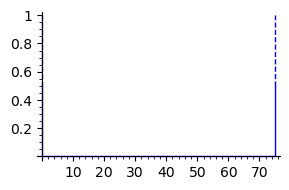

Le sommet central a/n ainsi que tous les autres sommets noirs sont inversibles

Etude au voisinage du sommet central a/n:


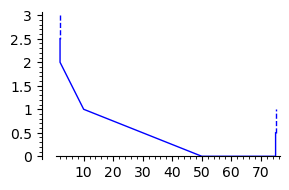

[(2, 2), (10, 1), (50, 0), (75, 0)] 


Proximité des sommets se réduisant sur a/n -> opposé de  [-1/8, -1/40, 0] 

Graphe final pour:



(X - 1)^50*X^25

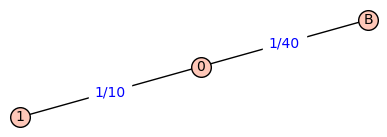

In [2]:
Belyi(25,50,5)